In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
os.getcwd()

'C:\\Users\\navee\\Desktop\\data science python\\machine learning'

In [87]:
df=pd.read_csv('C://Users//navee//Desktop/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [91]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [93]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [95]:
df.shape

(32561, 15)

In [97]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [99]:
df1 =df.iloc[:,[-1]]
df1

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [119]:
df1.value_counts()

 income
<=50K      24720
>50K        7841
Name: count, dtype: int64

In [121]:
Target= df1.value_counts()/len(df)
Target

 income
<=50K      0.75919
>50K       0.24081
Name: count, dtype: float64

TypeError: 'value' must be an instance of str or bytes, not a tuple

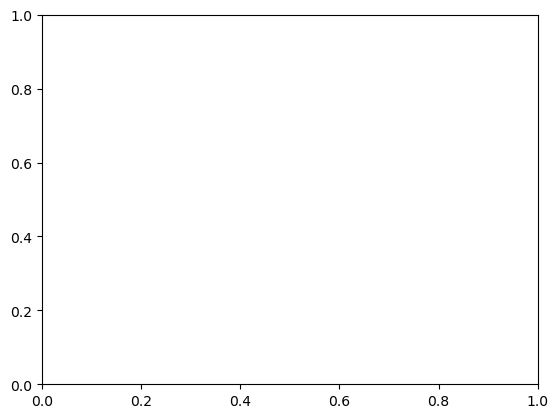

In [123]:
plt.bar(Target.index, Target)

In [145]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1 = lb.fit_transform(df1)

C:\Users\navee\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
categorical_data = df.columns[df.dtypes=="O"]
print(*categorical_data,sep="|")

 workclass| education| marital-status| occupation| relationship| race| sex| native-country| income


In [149]:
new_df = pd.get_dummies(df,columns=categorical_data)
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [151]:
x=new_df
y=df1

In [153]:
print(x.shape,y.shape)

(32561, 110) (32561,)


In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [163]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26048, 110) (6513, 110) (26048,) (6513,)


In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [167]:
pred= gnb.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
acc= accuracy_score(y_test,pred)
acc

0.7954859511745739

In [177]:
confusion=confusion_matrix(y_test,pred)
confusion

array([[4687,  260],
       [1072,  494]], dtype=int64)

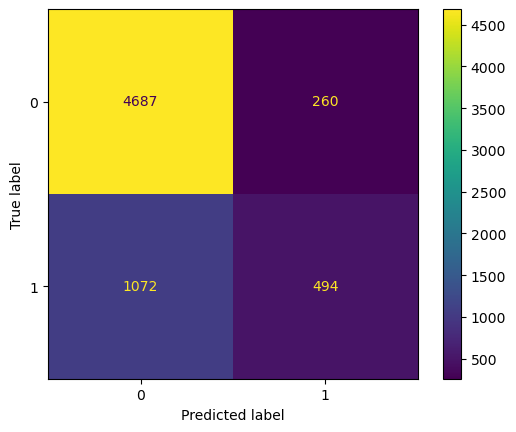

In [181]:
display = ConfusionMatrixDisplay(confusion)
display.plot()
plt.show()

In [183]:
from sklearn.naive_bayes import BernoulliNB
brn = BernoulliNB()
brn.fit(x_test,y_test)

BernoulliNB()

In [185]:
pred1 = brn.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [187]:
acc1 = accuracy_score(y_test,pred1)
acc1

1.0

In [189]:
conf = confusion_matrix(y_test,pred1)
conf

array([[4947,    0],
       [   0, 1566]], dtype=int64)

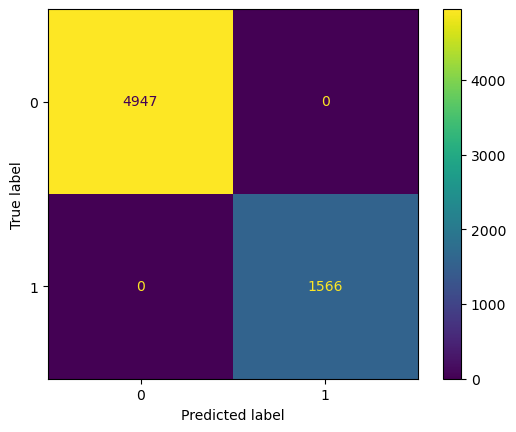

In [193]:
display1 = ConfusionMatrixDisplay(conf)
display1.plot()
plt.show()

<BarContainer object of 2 artists>

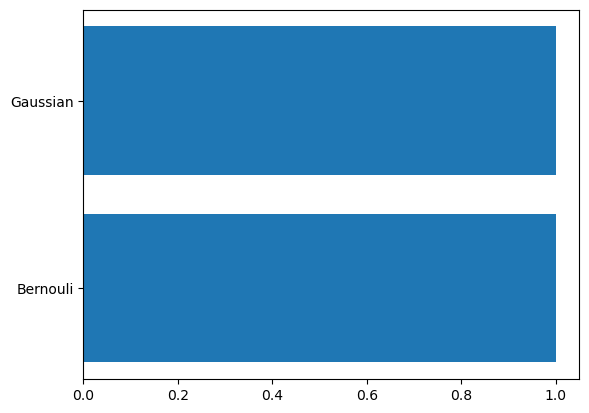

In [195]:
plt.barh(["Bernouli","Gaussian"],acc1,acc)